# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 14**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Noa Roebersen, 12247014

Paul Jungnickel, 15716554

Run the following cell to import NumPy, Matplotlib and some other functions.

In [1]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

---

# Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


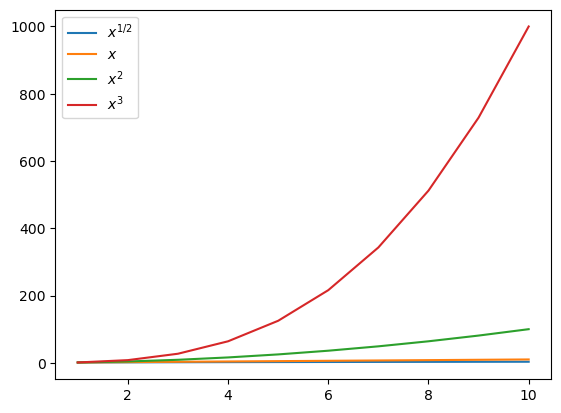

In [2]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

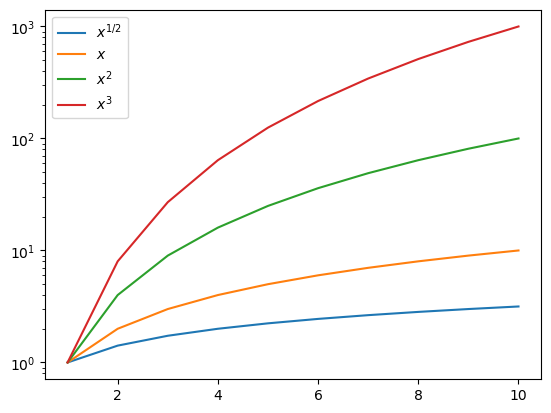

In [3]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


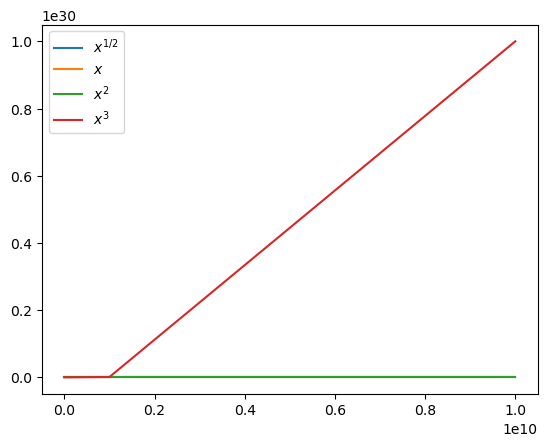

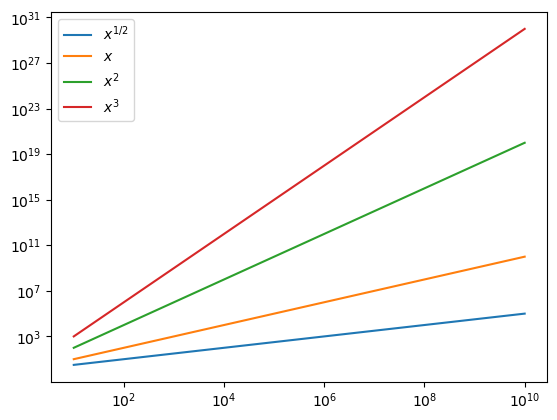

In [4]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Plots of arbitrary curves in the $(x,y)$ plane

So far, in all our plots, $y$ was a function of $x$. But this is not the only possibility. One can draw arbitrary curves in the $(x,y)$ plane. Next are two examples

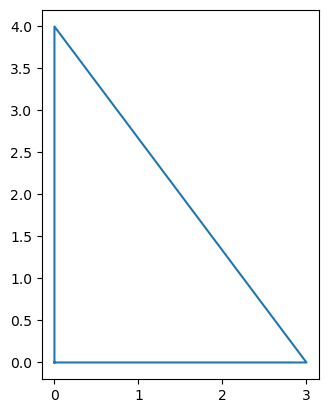

In [5]:
# plot a triangle
x = [0, 3, 0, 0]
y = [0, 0, 4, 0]
plt.plot(x,y)
# set aspect ratio to one
plt.gca().set_aspect('equal')

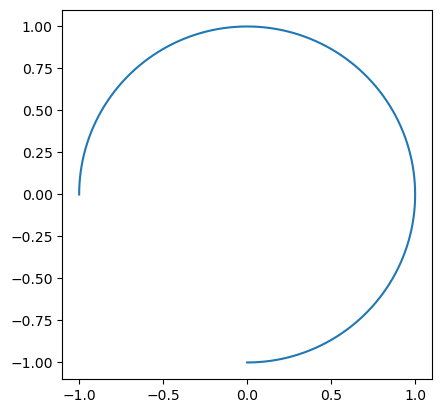

In [6]:
# we plot three quarters of a circle from (0,-1) going counter clockwise to (-1,0)
t = np.linspace(-0.5*np.pi, np.pi, 271)
x = np.cos(t)    
y = np.sin(t)
plt.plot(x,y)
# set the aspectratio to 1 so that it truely looks like a circle
plt.gca().set_aspect('equal')

---

# Exercise 1

Show that the Gram–Schmidt orthogonalization of an $m \times m$ matrix requires approximately $m^3$ multiplications and $m^3$ additions.



With Gram-Schmidt orthogonlization we orthogonolize each column vector of the matrix to the previous column vectors. For the first column, we don’t need any projection, so no operations are required.

The second vector, we want to compute orthogonal onto the first column vector. So, for the second vector, we compute the projection of the second vector onto the first vector. 

The projection of $v_k$ onto $v_1, v_2, \dots, v_{k-1}$ is given by:

$$
\text{proj}_{v_1}(v_k) = \frac{v_k \cdot v_1}{v_1 \cdot v_1} v_1
$$

This requires:
    1 dot product: $O(m)$ multiplications and additions.
    Subtraction of the projection: $O(m)$ operations.

Then, we do the same for each subsequent column vector. For each subsequent vector, we compute its projection onto all previously orthogonalized vectors. 

For subsequent vectors:

$$
\text{proj}_{v_j}(v_k) = \frac{v_k \cdot v_j}{v_j \cdot v_j} v_j \quad \text{for} \quad j = 1, 2, \dots, k-1
$$

The orthogonalized vector $u_k$ is then:

$$
u_k = v_k - \sum_{j=1}^{k-1} \text{proj}_{v_j}(v_k)
$$

This requires:
    $k$ dot products, where $k$ is the number of previously orthogonalized vectors. Each dot product requires $O(m)$ operations.
    Subtraction of projections: $O(m)$ operations.

For each vector $v_k$, the total number of operations is $O(k \cdot m)$. Summing over all $m$ vectors:

$
O\left( \sum_{k=1}^{m} k \cdot m \right) = O(m \cdot \sum_{k=1}^{m} k) = O(m \cdot \frac{m(m+1)}{2}) = O(m^3)
$

Thus, the Gram–Schmidt orthogonalization of an $m \times m$ matrix requires approximately $m^3$ multiplications and $m^3$ additions.


-----
# Exercise 2
We want to reconstruct a function $s(t)$ (also called the signal in this exercise), $t \in [0,1]$, from data given by
$$d(t) = \int_0^1 s(t) \, dt + \text{noise}.$$
We assume the data is given at $n$ equally space time points $t_j = j h$, $h = \frac{1}{n}$, $j=1,2, \ldots, n$. The data is therefore a vector $d = [d_1, \ldots, d_n]$, where $d_j$ denotes the value at $t_j$. 
The signal $s$ is to be reconstructed at time points 
$t_{j-1/2} = (j-1/2)h$ for $j = 1,2, \ldots, n$. It is described by a vector $s = [s_1, \ldots, s_n]$ with $s_j$ the value at $t_{j-1/2}$.
Numerical integration is described in Chapter 8 of the book by Heath. Using the composite midpoint rule, the vectors $s$ and $d$ are related by
$$d = A \cdot s + \text{noise}$$
where
$$A = \begin{bmatrix} 
h & 0 & 0 & \ldots & 0 \\
h & h & 0 & \ldots & 0 \\
h & h & h & \ddots &  \vdots \\
\vdots & \vdots & \ddots & \ddots & 0 \\
h & h & \ldots & h  & h 
\end{bmatrix}.$$


## (a)
As a test signal we take
$$s_{\rm true}(t) = \left\{
\begin{array}{ll} 
1 & \text{if $0.05 \le |t-1/2|<0.15$}\\
0.7 & \text{if $|t-1/2|<0.05$}\\
0 & \text{otherwise} \end{array} 
\right. .$$ 
Generate data $d_0$ without noise and data $d_\epsilon$ with noise, where the noise is normally distributed, with mean zero and standard deviation $\epsilon = 0.005$.
Take for example $n=100$. Plot the data.

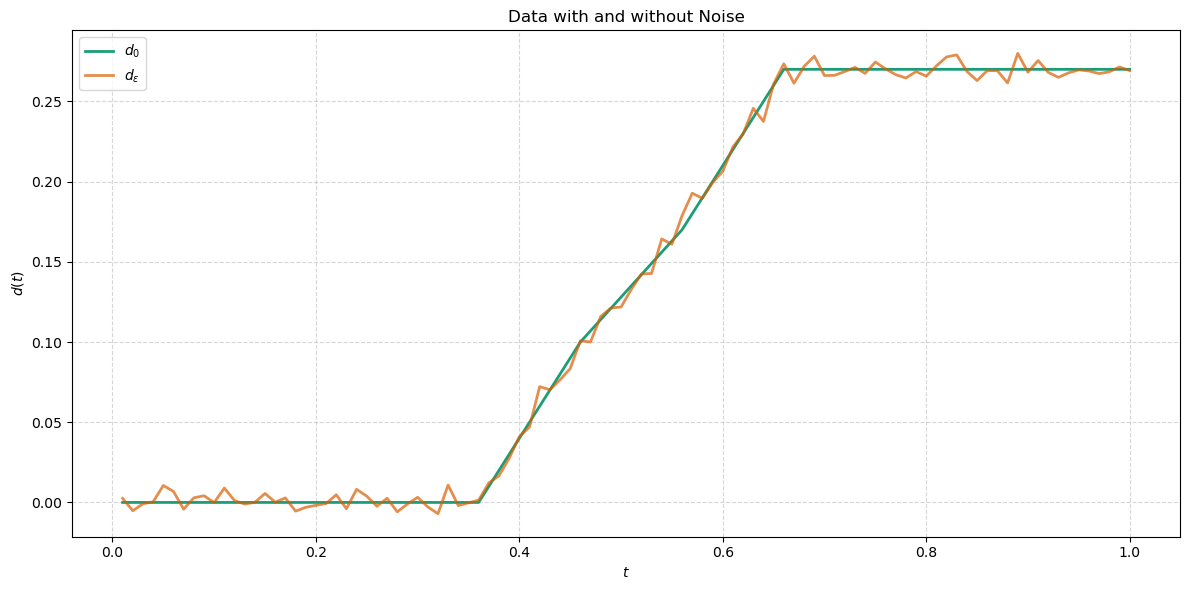

In [ ]:
n = 100
h = 1 / n
std = 0.005
t_j = np.arange(1, n + 1) * h
t_midpoints = (np.arange(1, n + 1) - 0.5) * h

# true signal s_true at t-1/2
s_true = np.zeros(n)
for j, t in enumerate(t_midpoints):
    t_mid = (j - 0.5) * h
    if 0.05 <= abs(t_mid - 0.5) < 0.15:
        s_true[j] = 1
    if abs(t_mid - 0.5) < 0.05:
        s_true[j] = 0.7

# lower triangle of array.
A = np.tril(np.ones((n, n))) * h

# data without noise
d_0 = A @ s_true

# noisy data d_epsilon
noise = np.random.normal(0, std, n)
d_epsilon = d_0 + noise

color_d0 = "#1B9E77" 
color_depsilon = "#D95F02"

plt.figure(figsize=(12, 6))
plt.plot(t_j, d_0, label=r"$d_0$", color=color_d0, linewidth=2)
plt.plot(t_j, d_epsilon, label=r"$d_{\epsilon}$", color=color_depsilon, linewidth=2, alpha=0.7)

plt.xlabel("$t$")
plt.ylabel("$d(t)$")
plt.title("Data with and without Noise")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## (b)
Try to determine $s$ from $d_0$ by inverting the matrix $A$, ignoring the noise term.
Do the same with $d_\epsilon$ instead of $d_0$. Plot the results. What do you observe about the errors in the inversion?

You may use a library routine for matrix inversion/solving a linear system.

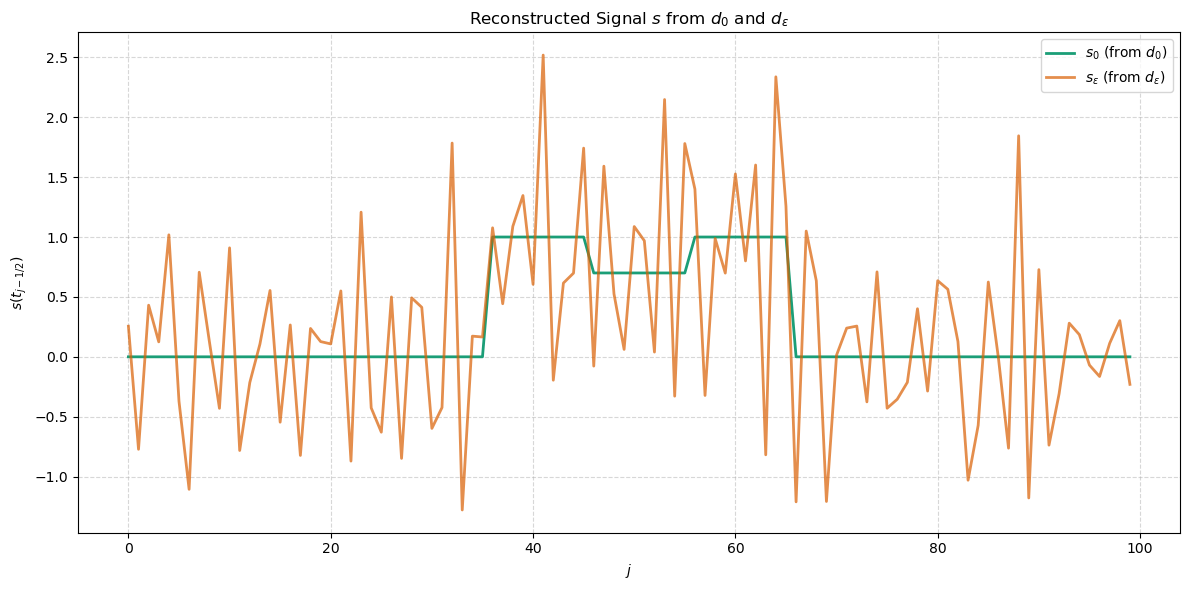

The error of s_epsilon, as defined by the 2-norm of (s_0 - s_epsilon) is
7.19


In [ ]:
s_0 = np.linalg.solve(A, d_0)
s_epsilon = np.linalg.solve(A, d_epsilon)

plt.figure(figsize=(12, 6))
plt.plot(s_0, label=r"$s_0$ (from $d_0$)", color="#1B9E77", linewidth=2)
plt.plot(s_epsilon, label=r"$s_{\epsilon}$ (from $d_{\epsilon}$)", color="#D95F02", linewidth=2, alpha=0.7)
plt.xlabel("$j$")
plt.ylabel("$s(t_{j-1/2})$")
plt.title("Reconstructed Signal $s$ from $d_0$ and $d_{\epsilon}$")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Find error
# 2-norm by default
error = np.linalg.norm(s_0 - s_epsilon)
print(r"The error of s_epsilon, as defined by the 2-norm of (s_0 - s_epsilon) is" )
print(round(error,2))

## (c)
One way to address the issue just observed is by truncated SVD regularization. Suppose $A = U \Sigma V^T$ is the singular value decomposition of $A$. 

Express the inverse $A^{-1}$ in terms of $U, V$ and $\Sigma$, or in terms of $U$, $V$ and the singular values.

Let $k$ be some integer less or equal than $n$. Denote by $B_k$ the matrix that is obtained from $A$ by setting the smallest $n-k$ singular values to zero (and keeping $U$, $V$ and the first $k$ singular values the same). 

In truncated SVD regularization, an estimate for $s$ is obtained by applying the pseudoinverse $B_k^{+}$ to the data (instead of the true inverse $A^{-1}$) (see section 3.6 of Heath). Try truncated SVD regularization for various values of $k$. Show that for certain values of $k$ the result obtained by truncated SVD regularization is a "better" approximation of the true signal than the result obtained by the true inverse $A^{-1}$.
Note that better can mean different things, it can mean "visually better" or "quantitatively better" in some norm to be specified, try to be precise in what you write down.

What happens if you choose $k$ too small?

You may use library routines to compute the SVD.

Singular value decomposition of A, 

$A = U \Sigma V^T$,

Where U and T are orthogonal matrices. The inverse of A is,

$A^{-1} = V \Sigma^{-1} U^T$.

After truncation of the k smallest values (i.e. setting $n-k$ smallest values of the matrix to zero) we have the pseudoinverse matrix,

$B_k^{+} = V_k \Sigma_{k}^{-1} U_k^T$.

So, when we choose a $k$ that is too small, we will not only remove the noisy part of the matrix A, but also the part of A that contains important information due to over simplification.



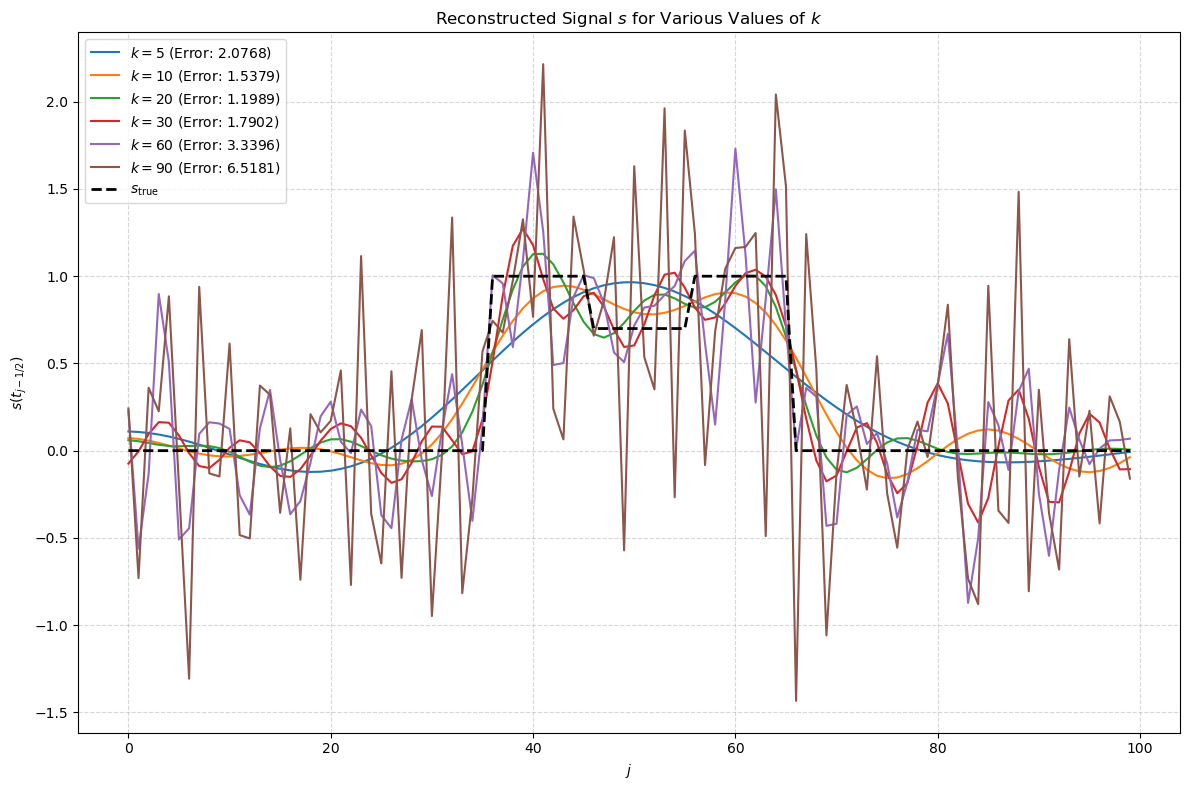

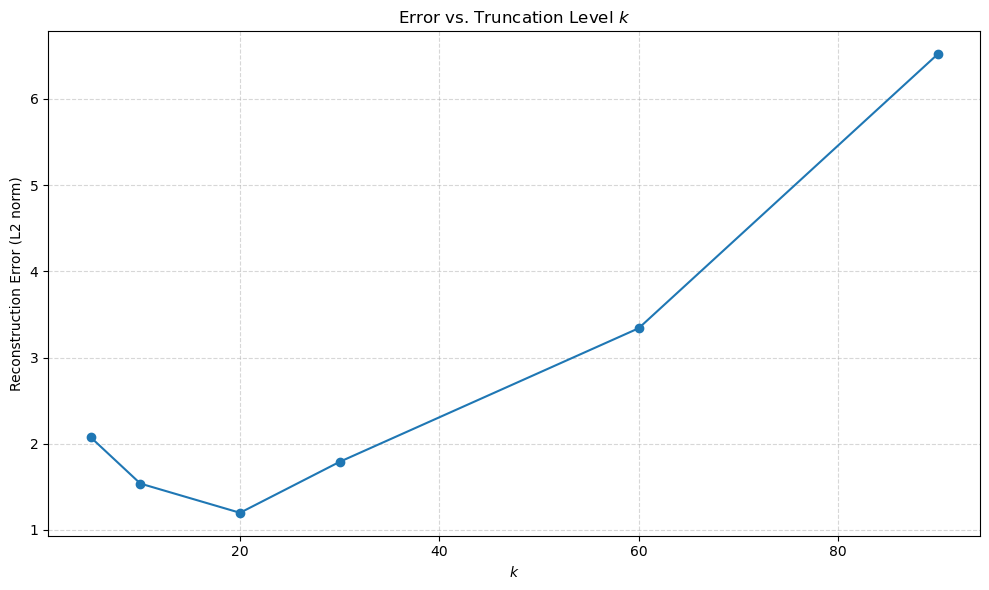

In [9]:
def truncated_svd(A, d, k):
    """Estimate s in As + noise = d by truncated svd regularization of matrix A 

    Input: 
    A (numpy 2x2 array): Matrix 
    d (numpy array): data
    k (int): number of truncations

    Output:
    s_k (numpy array): solution to (truncated) system
    """
    # SVD regularization
    U, Sigma, Vt = la.svd(A)
    V = Vt.T

    # truncation of Sigma
    # note - Sigma is defined as diagonal matrix with singular values in descending order
    Sigma_k = np.zeros((k, k))
    np.fill_diagonal(Sigma_k, Sigma[:k])
    
    # truncate matrices U and V
    U_k = U[:, :k]
    V_k = V[:, :k]
    
    # pseudoinverse 
    Sigma_k_inv = np.linalg.inv(Sigma_k)
    B_k_plus = V_k @ Sigma_k_inv @ U_k.T
    
    # find estimate of s with truncated matrix
    s_k = B_k_plus @ d
    return s_k


k_values = [5, 10, 20, 30, 60, 90] 
errors = []


plt.figure(figsize=(12, 8))
for k in k_values:
    s_k = truncated_svd(A, d_epsilon, k)
    
    # calculate error with known s_true, defined in a)
    # this is the 2-norm by default
    error = np.linalg.norm(s_k - s_true)
    errors.append(error)

    plt.plot(s_k, label=f"$k={k}$ (Error: {error:.4f})")

plt.plot(s_true, label="$s_{\\rm true}$", color="black", linestyle="--", linewidth=2)
plt.xlabel("$j$")
plt.ylabel("$s(t_{j-1/2})$")
plt.title("Reconstructed Signal $s$ for Various Values of $k$")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker="o")
plt.xlabel("$k$")
plt.ylabel("Reconstruction Error (L2 norm)")
plt.title("Error vs. Truncation Level $k$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## (d)

Make a plot of the singular values of $A$. Explain your findings in (b) and (c). Part of your explanation should refer to the plot.

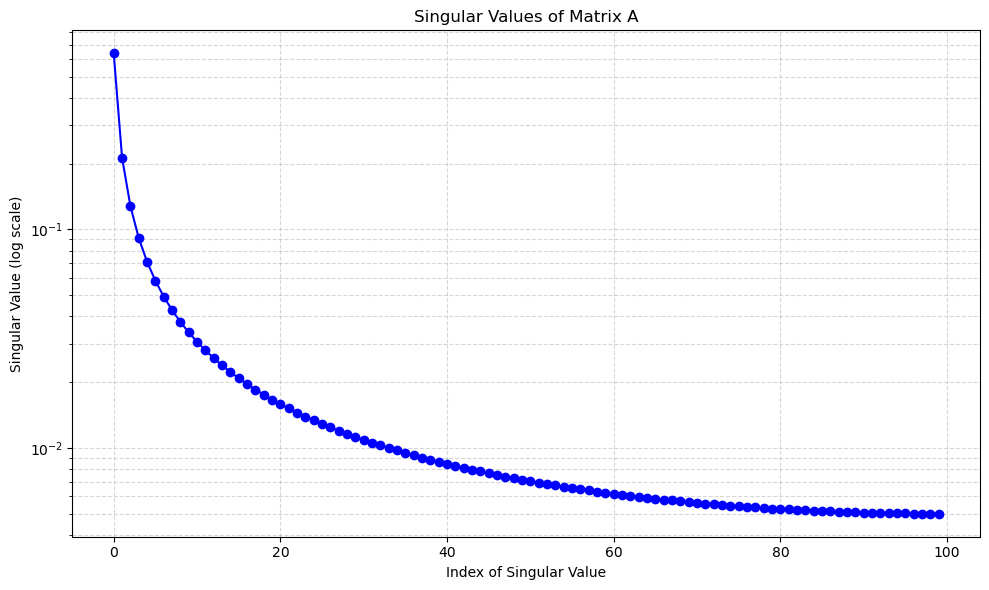

In [10]:
U, Sigma, Vt = la.svd(A)

plt.figure(figsize=(10, 6))
plt.plot(Sigma, 'bo-', markersize=6)
plt.yscale('log')
plt.xlabel("Index of Singular Value")
plt.ylabel("Singular Value (log scale)")
plt.title("Singular Values of Matrix A")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In the plot, we see the singular values of $A$ (denoted as $\Sigma$), which are arranged in descending order. The absolute value of a singular value corresponds to the most important directions in the data space, representing the dominant features of $A$. Small singular values have little effect on the solution, but if the data is noisy, they can introduce instability and amplify the noise.

In part **(b)**, we solve for the signal by directly inverting $A$ without regularization. The result clearly shows amplified noise, which happens because $A$ is ill-conditioned. Some of the singular values are small, meaning they don't contribute significantly to the solution but still influence the outcome by amplifying the noise.

In part **(c)**, we truncate some of the very small singular values, keeping only the first $k$ singular values (where $k$ ranges from 5 to 90). In the second plot of part **(c)**, we see that the error is minimized around $k = 20$, indicating that the best result is obtained by truncating the smallest 80 singular values. This makes sense because, as shown in the plot (with the log scale on the y-axis), the singular values beyond the first 20 contribute much less to the overall structure of $A$.
